In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import ipywidgets as widgets
import statistics

In [12]:
nltk.download(['vader_lexicon'])

[nltk_data] Downloading package vader_lexicon to C:\Users\Tim
[nltk_data]     Kraemer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
tweet_data = pd.read_csv(r'Tweet.csv', index_col=0)
tweet_data

C:\Users\Tim Kraemer\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,writer,post_date,body,comment_num,retweet_num,like_num
tweet_id,,,,,,
550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...
1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5


How to access a single tweet

In [14]:
tweet_data.loc[550441672312512512].body

'Insanity of today weirdo massive selling. $aapl bid up 45 cents after hours after non stop selling in trading hours'

In [15]:
company_data = pd.read_csv(r'Company.csv')
company_data

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [16]:
company_tweet_data = pd.read_csv('Company_Tweet.csv')
company_tweet_data

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [17]:
set(company_tweet_data.ticker_symbol)

{'AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA'}

give me all tweet ids that are related to AAPL

In [18]:
tweets_from_apple = company_tweet_data[company_tweet_data.ticker_symbol=='AAPL'].tweet_id

In [43]:
TA = tweet_data.loc[tweets_from_apple]
print(TA)

                            writer   post_date  \
tweet_id                                         
550803612197457920      SentiQuant  1420156789   
550803610825928706      SentiQuant  1420156788   
550803225113157632     MacHashNews  1420156696   
550802957370159104   WaltLightShed  1420156633   
550802855129382912    2waystrading  1420156608   
...                            ...         ...   
1212159254884433921  QuantWolfLine  1577836261   
1212159275637886976     GMGRIFF_79  1577836266   
1212159765914079234      TEEELAZER  1577836383   
1212160410692046849    MoriaCrypto  1577836537   
1212160477159206912       treabase  1577836553   

                                                                  body  \
tweet_id                                                                 
550803612197457920   #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...   
550803610825928706   #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...   
550803225113157632   Rumor Roundup: What to expect wh

Graph of postdate vs likesum

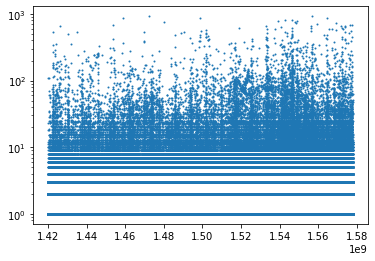

In [20]:
plt.scatter(TA.post_date, TA.like_num + 1, s=1)
plt.yscale('log')

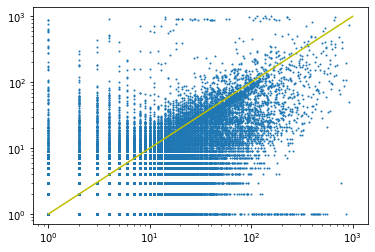

In [21]:
plt.scatter(TA.like_num+1, TA.retweet_num+1, s=1)
plt.yscale('log')
plt.xscale('log')
plt.plot([1, 1000], [1, 1000], 'y')

In [22]:
SIA = SentimentIntensityAnalyzer()

In [23]:
SIA.polarity_scores('Insanity of today weirdo massive selling. $aapl bid up 45 cents after hours after non stop selling in trading hours')

{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.8271}

In [24]:
compound_scores = []
for s in tweet_data[0:100].body:
    compound_scores.append(SIA.polarity_scores(s)['compound'])

In [44]:
print(compound_scores)

[0.0, -0.8271, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.0, 0.0, 0.0, 0.2023, 0.6369, 0.2023, 0.0, 0.1531, -0.6486, 0.0, 0.1027, 0.6249, 0.0, -0.7506, -0.7506, -0.7506, -0.7712, -0.7506, 0.0, 0.0772, -0.2263, -0.7506, -0.7506, 0.0258, -0.7506, -0.5574, -0.5719, 0.0, 0.0, -0.7506, 0.5423, 0.3182, -0.3818, 0.7456, -0.7712, 0.4404, 0.0, 0.0, 0.4404, 0.0, 0.0, -0.7964, 0.1779, 0.0, 0.4939, -0.1779, -0.4854, 0.7783, 0.7783, 0.7783, 0.0, 0.5106, 0.7184, 0.2023, 0.0, 0.1779, 0.0, 0.0, 0.7783, 0.7783, 0.4404, 0.1779, 0.8065, 0.0, -0.6908, 0.0, 0.0, 0.0, 0.0, 0.3595, 0.2732, 0.0, -0.3612, 0.5106, 0.25, -0.4767, 0.0, 0.0, 0.1779, -0.0772, -0.2732, 0.4019, -0.2732, -0.3612, -0.2732, -0.3182, 0.0, -0.5106]


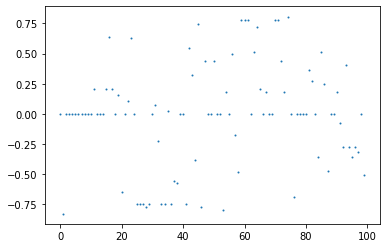

In [46]:
plt.scatter(range(len(compound_scores)), compound_scores, s=1)

load historical stock data

In [26]:
AAPL_historic_data = pd.read_csv('AAPL_Historical_Data.csv')

In [27]:
AAPL_historic_data

,Date,Close/Last,Volume,Open,High,Low
0,02/11/2021,$135.13,64280030,$135.9,$136.39,$133.77
1,02/10/2021,$135.39,73046560,$136.48,$136.99,$134.4
2,02/09/2021,$136.01,76774210,$136.62,$137.877,$135.85
3,02/08/2021,$136.91,71297210,$136.03,$136.96,$134.92
4,02/05/2021,$136.76,75693830,$137.35,$137.42,$135.86
...,...,...,...,...,...,...
2511,02/18/2011,$12.52,813306995,$12.8111,$12.8393,$12.4829
2512,02/17/2011,$12.7964,529280428,$12.7589,$12.8668,$12.7329
2513,02/16/2011,$12.9689,475068530,$12.8857,$13.0321,$12.875
2514,02/15/2011,$12.8536,282927287,$12.8282,$12.8561,$12.7696


In [28]:
apple_stock_dates = pd.to_datetime(AAPL_historic_data.Date)

In [29]:
apple_stock_dates

0      2021-02-11
1      2021-02-10
2      2021-02-09
3      2021-02-08
4      2021-02-05
          ...    
2511   2011-02-18
2512   2011-02-17
2513   2011-02-16
2514   2011-02-15
2515   2011-02-14
Name: Date, Length: 2516, dtype: datetime64[ns]

In [30]:
apple_stock_prices = pd.Series([float(s[2:]) for s in AAPL_historic_data[' Close/Last']], index=apple_stock_dates)

In [31]:
apple_stock_prices

Date
2021-02-11    135.1300
2021-02-10    135.3900
2021-02-09    136.0100
2021-02-08    136.9100
2021-02-05    136.7600
                ...   
2011-02-18     12.5200
2011-02-17     12.7964
2011-02-16     12.9689
2011-02-15     12.8536
2011-02-14     12.8279
Length: 2516, dtype: float64

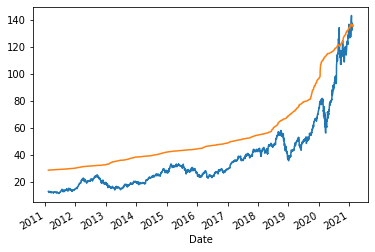

In [33]:
apple_stock_prices[:].plot()
apple_stock_prices.rolling('1d').median().plot()